In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!ls nyiso_price_1hr/20170401rtlbmp_zone_csv

In [15]:
df_int = pd.read_csv('nyiso_price_1hr/' + '20170401rtlbmp_zone_csv/' + '20170401rtlbmp_zone.csv', parse_dates = ['Time Stamp'])

In [16]:
df_int.Name.unique()

array(['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'H Q', 'HUD VL', 'LONGIL',
       'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 'NPX', 'O H', 'PJM', 'WEST'], dtype=object)

In [ ]:
df_int.head(20)

In [ ]:
nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'LBMP ($/MWHr)']].reset_index(drop = True)

In [ ]:
df_nyc.head()

In [ ]:
df_nyc.columns = ['time_stamp', 'load']

In [ ]:
df_nyc.set_index('time_stamp', inplace = True)

df_nyc['time_stamp_local'] = df_nyc.index

df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern'), inplace = True)

In [ ]:
df_nyc.head()

In [ ]:
df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)

In [ ]:
df_nyc.head()

In [ ]:
df_nyc.plot()

In [2]:
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0.

In [3]:
def select_zone(dir_path, filename, zone):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])#, dtype={'Integrated Load' : np.float64})
    nyc_ind = df_int.Name.apply(lambda x: zone in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'LBMP ($/MWHr)']].reset_index(drop = True)
    df_nyc.columns = ['time_stamp', 'price']
    df_nyc.loc[:,'price'] = df_nyc.price.apply(is_number)
    df_nyc.set_index('time_stamp', inplace = True)
    df_nyc['time_stamp_local'] = df_nyc.index
    df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern', ambiguous='infer'), inplace = True)
    df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)
    #output_filename = filename[:8] + 'nyc.csv'
    #df_nyc.to_csv(dir_path + output_filename)
    return df_nyc

In [97]:
zone = 'WEST'#'NORTH'#'MILLWD' #'MHK VL'#'LONGIL'#'HUD VL' #'GENESE' #'DUNWOD' #'CENTRL' #'CAPITL' #'N.Y.C.'
nyiso_dir = 'nyiso_price_1hr/'
df_t = pd.DataFrame()
for dir_path in os.listdir(nyiso_dir):
    if 'csv' in dir_path:
        dir_path = nyiso_dir + dir_path + '/'
        for filename in os.listdir(dir_path):
            if 'rtlbmp' in filename:
                df_t = pd.concat([df_t, select_zone(dir_path, filename, zone)])
                #select_nyc(dir_path, filename)

In [98]:
df_t.shape

(9453, 2)

In [99]:
df_t.head()

,price,time_stamp_local
time_stamp,,
2017-01-20 05:00:00+00:00,17.81,2017-01-20 00:00:00
2017-01-20 06:00:00+00:00,18.26,2017-01-20 01:00:00
2017-01-20 07:00:00+00:00,18.16,2017-01-20 02:00:00
2017-01-20 08:00:00+00:00,21.44,2017-01-20 03:00:00
2017-01-20 09:00:00+00:00,19.61,2017-01-20 04:00:00


In [100]:
df_t.sort_index(inplace = True)

In [101]:
df_t.head()

,price,time_stamp_local
time_stamp,,
2017-01-01 05:00:00+00:00,3.39,2017-01-01 00:00:00
2017-01-01 06:00:00+00:00,2.21,2017-01-01 01:00:00
2017-01-01 07:00:00+00:00,2.21,2017-01-01 02:00:00
2017-01-01 08:00:00+00:00,0.64,2017-01-01 03:00:00
2017-01-01 09:00:00+00:00,5.24,2017-01-01 04:00:00


In [102]:
df_t.to_csv('nyiso_' + zone + '_price.csv')

(0, 500)

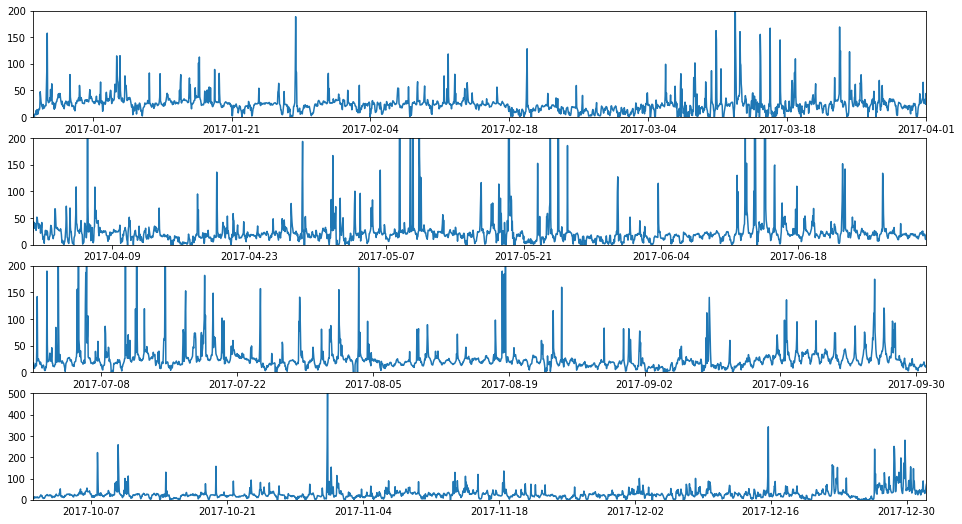

In [103]:
fig, ax = plt.subplots(nrows = 4, figsize = (16, 9))
ax[0].plot(df_t.time_stamp_local, df_t.price)
ax[0].set_xlim(pd.datetime(2017, 1, 1), pd.datetime(2017, 4, 1))
ax[0].set_ylim(0, 200)
ax[1].plot(df_t.time_stamp_local, df_t.price)
ax[1].set_xlim(pd.datetime(2017, 4, 1), pd.datetime(2017, 7, 1))
ax[1].set_ylim(0, 200)
ax[2].plot(df_t.time_stamp_local, df_t.price)
ax[2].set_xlim(pd.datetime(2017, 7, 1), pd.datetime(2017, 10, 1))
ax[2].set_ylim(0, 200)
ax[3].plot(df_t.time_stamp_local, df_t.price)
ax[3].set_xlim(pd.datetime(2017, 10, 1), pd.datetime(2018, 1, 1))
ax[3].set_ylim(0, 500)

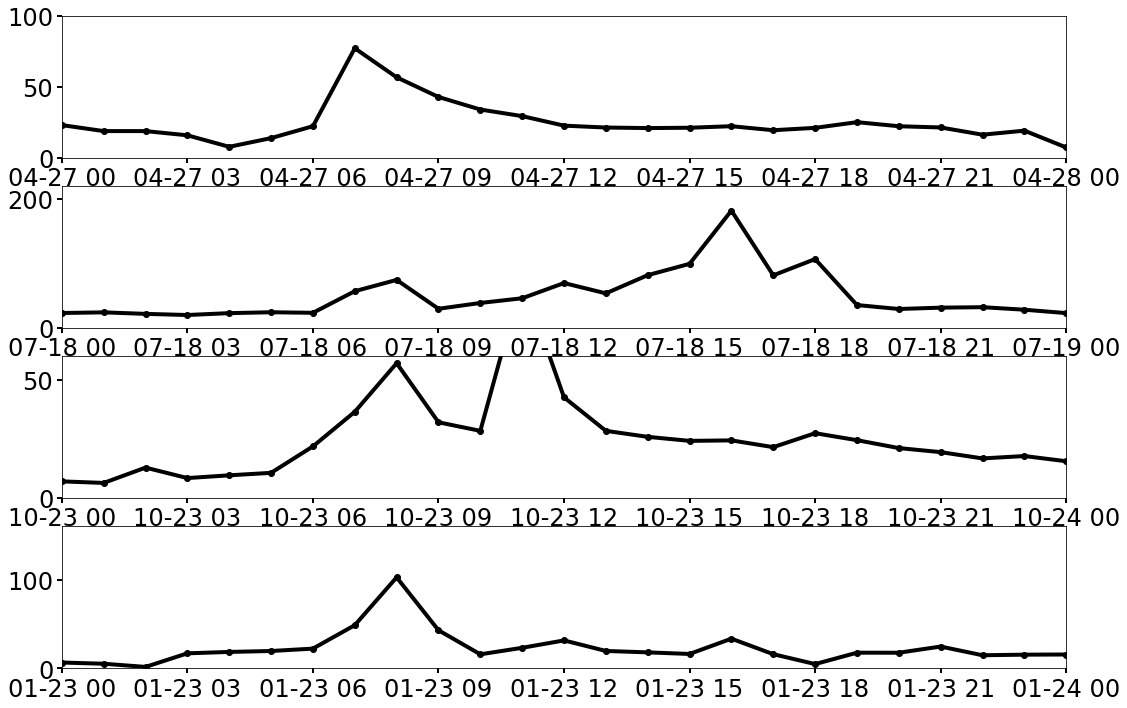

In [104]:
## leave only hour info when plotting
fig, ax = plt.subplots(nrows = 4, figsize = (18, 12))
ax[0].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[0].set_xlim(pd.datetime(2017, 4, 27), pd.datetime(2017, 4, 28))
ax[0].set_ylim(0, 100)
ax[0].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

ax[1].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[1].set_xlim(pd.datetime(2017, 7, 18), pd.datetime(2017, 7, 19))
ax[1].set_ylim(0, 220)
ax[1].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

ax[2].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[2].set_xlim(pd.datetime(2017, 10, 23), pd.datetime(2017, 10, 24))
ax[2].set_ylim(0, 60)
ax[2].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

ax[3].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[3].set_xlim(pd.datetime(2018, 1, 23), pd.datetime(2018, 1, 24))
ax[3].set_ylim(0, 160)
ax[3].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

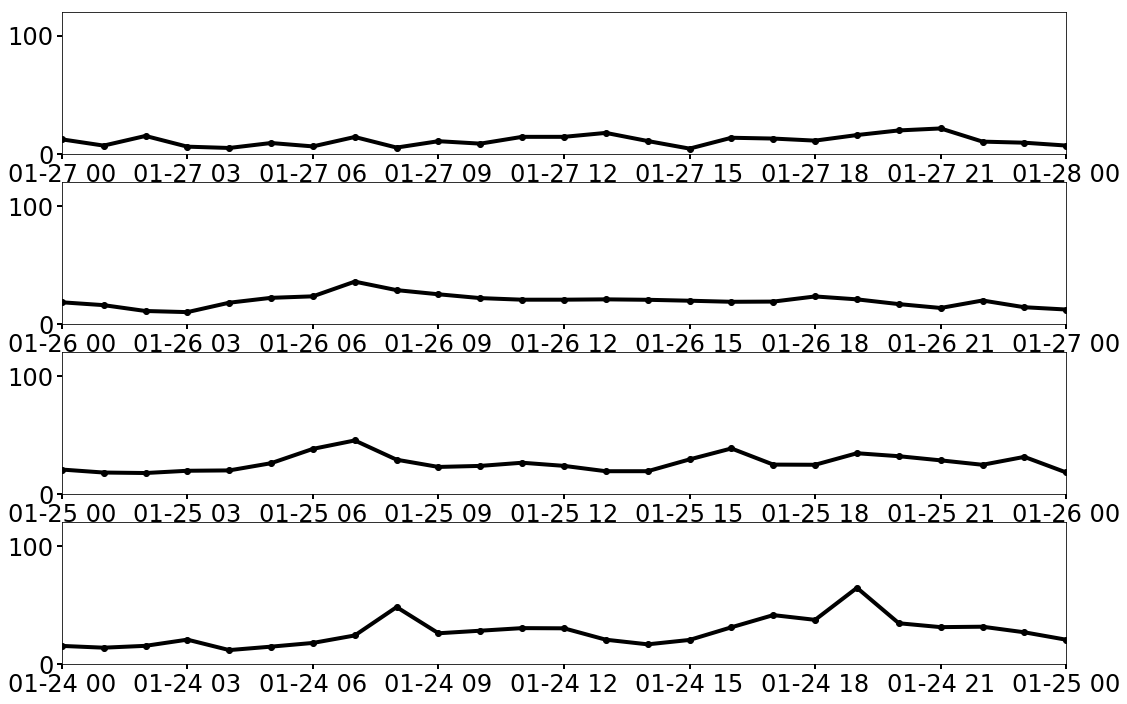

In [105]:
## leave only hour info when plotting
fig, ax = plt.subplots(nrows = 4, figsize = (18, 12))
ax[0].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[0].set_xlim(pd.datetime(2018, 1, 27), pd.datetime(2018, 1, 28))
ax[0].set_ylim(0, 120)
ax[0].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

ax[1].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[1].set_xlim(pd.datetime(2018, 1, 26), pd.datetime(2018, 1, 27))
ax[1].set_ylim(0, 120)
ax[1].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

ax[2].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[2].set_xlim(pd.datetime(2018, 1, 25), pd.datetime(2018, 1, 26))
ax[2].set_ylim(0, 120)
ax[2].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

ax[3].plot(df_t.time_stamp_local, df_t.price, 'o-', linewidth = 4, 
        color = 'black')
ax[3].set_xlim(pd.datetime(2018, 1, 24), pd.datetime(2018, 1, 25))
ax[3].set_ylim(0, 120)
ax[3].tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

In [26]:
df_t.dtypes

price                      float64
time_stamp_local    datetime64[ns]
dtype: object

In [ ]:
df_t.loc[:,'integrated_load'] = df_t.integrated_load.apply(is_number)

In [ ]:
#df_cmp = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp'])

In [ ]:
# fig, ax = plt.subplots(figsize = (8, 8))
# #ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
# ax.plot(df_t.index, df_t.loc[:,'time_stamp_local'], '.', label = 'GMT')
# # ax.set_xlim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# # ax.set_ylim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# ax.set_xlim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))
# ax.set_ylim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))

In [ ]:
fig, ax = plt.subplots(figsize = (16, 9))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.index, df_t.loc[:,'load'], '.', label = 'GMT')
#ax.plot(df_cmp.iloc[:,0], df_cmp.iloc[:,1], '.', label = 'EST')
ax.legend()
#ax.set_xlim(pd.datetime(2017,3,8), pd.datetime(2017,3,15))

In [ ]:
df_t.shape

In [ ]:
df_t.dtypes

In [ ]:
df_t.head()

In [ ]:
df_t.sort_index(inplace = True)

In [ ]:
df_t.head()

In [ ]:
df_t.tail()

In [ ]:
df_t.dropna(inplace=True)

In [ ]:
df_t.shape

In [ ]:
df_test = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [ ]:
df_test.head()

In [ ]:
df_test.time_stamp.dtype

In [ ]:
df_test.sort_values(['time_stamp'], inplace = True)

In [ ]:
df_test.head()

In [ ]:
df_test.to_csv('nyiso_2017.csv', index = False)